In [338]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



## Preprocessing

In [339]:
# Load the CSV file
file_path = "EGX30_2000-2025.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


       Date      Price       Open       High        Low     Vol. Change %
0  2/6/2025  30,011.84  29,735.59  30,011.84  29,735.59   83.50M    0.93%
1  2/5/2025  29,735.59  29,668.47  29,772.63  29,596.50  103.71M    0.23%
2  2/4/2025  29,668.47  29,754.77  29,937.39  29,668.47  135.05M   -0.29%
3  2/3/2025  29,754.77  29,917.96  30,001.23  29,698.79  152.06M   -0.55%
4  2/2/2025  29,917.96  30,010.62  30,198.22  29,917.96  103.16M   -0.31%


**Date:** The trading date of the EGX30 index (formatted as MM/DD/YYYY).

**Price:** The closing price of the EGX30 index on that particular day.

**Open:** The opening price of the EGX30 index at the start of the trading session.

**High:** The highest price the EGX30 index reached during the trading session.

**Low:** The lowest price the EGX30 index reached during the trading session.

**Vol. (Volume):** The total number of shares traded during that day.

**Change %:** The percentage change in the EGX30 index compared to the previous trading day's closing price.

In [340]:
# # Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])


In [341]:
print(df.head())


        Date      Price       Open       High        Low     Vol. Change %
0 2025-02-06  30,011.84  29,735.59  30,011.84  29,735.59   83.50M    0.93%
1 2025-02-05  29,735.59  29,668.47  29,772.63  29,596.50  103.71M    0.23%
2 2025-02-04  29,668.47  29,754.77  29,937.39  29,668.47  135.05M   -0.29%
3 2025-02-03  29,754.77  29,917.96  30,001.23  29,698.79  152.06M   -0.55%
4 2025-02-02  29,917.96  30,010.62  30,198.22  29,917.96  103.16M   -0.31%


In [342]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6106 entries, 0 to 6105
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      6106 non-null   datetime64[ns]
 1   Price     6106 non-null   object        
 2   Open      6106 non-null   object        
 3   High      6106 non-null   object        
 4   Low       6106 non-null   object        
 5   Vol.      3906 non-null   object        
 6   Change %  6106 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 334.0+ KB
None


In [343]:
print(df.describe())

                                Date
count                           6106
mean   2012-07-24 03:15:30.363576832
min              2000-02-06 00:00:00
25%              2006-04-06 18:00:00
50%              2012-07-29 12:00:00
75%              2018-10-29 18:00:00
max              2025-02-06 00:00:00


In [344]:
# Convert numerical columns by removing commas and converting to float
cols_to_convert = ['Price', 'Open', 'High', 'Low']
df[cols_to_convert] = df[cols_to_convert].replace(',', '', regex=True).astype(float)

In [345]:
# Convert Change % column (remove '%' and convert to decimal)
df['Change %'] = df['Change %'].str.replace('%', '', regex=True).astype(float) / 100

In [346]:

def convert_vol(value):
    if isinstance(value, str):  # Ensure value is a string
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'B' in value:
            return float(value.replace('B', '')) * 1_000_000_000
        else:
            return float(value)  # Convert numbers stored as strings
    return value  # Return original if already float or NaN

df['Vol.'] = df['Vol.'].apply(convert_vol)



In [347]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2025-02-06,30011.84,29735.59,30011.84,29735.59,83500000.0,0.0093
1,2025-02-05,29735.59,29668.47,29772.63,29596.50,103710000.0,0.0023
2,2025-02-04,29668.47,29754.77,29937.39,29668.47,135050000.0,-0.0029
3,2025-02-03,29754.77,29917.96,30001.23,29698.79,152060000.0,-0.0055
4,2025-02-02,29917.96,30010.62,30198.22,29917.96,103160000.0,-0.0031


In [348]:
# Check how many missing values exist in the Volume column initially.
initial_missing = df['Vol.'].isnull().sum()
print("\nMissing 'Vol.' values before imputation:", initial_missing)


Missing 'Vol.' values before imputation: 2200


In [349]:
print(df.isnull().sum())

Date           0
Price          0
Open           0
High           0
Low            0
Vol.        2200
Change %       0
dtype: int64


In [350]:
df.dropna(inplace=True)

In [351]:
print(df.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [352]:
print(df.dtypes)

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %           float64
dtype: object


In [353]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2025-02-06,30011.84,29735.59,30011.84,29735.59,83500000.0,0.0093
1,2025-02-05,29735.59,29668.47,29772.63,29596.50,103710000.0,0.0023
2,2025-02-04,29668.47,29754.77,29937.39,29668.47,135050000.0,-0.0029
3,2025-02-03,29754.77,29917.96,30001.23,29698.79,152060000.0,-0.0055
4,2025-02-02,29917.96,30010.62,30198.22,29917.96,103160000.0,-0.0031
...,...,...,...,...,...,...,...
3928,2008-12-03,3979.71,4014.26,4085.91,3979.71,40440000.0,0.0107
3929,2008-12-02,3937.66,3886.00,3937.66,3829.44,35650000.0,-0.0211
3930,2008-12-01,4022.58,4185.59,4185.59,4022.58,36480000.0,-0.0436
3931,2008-11-30,4205.86,4100.29,4228.08,4100.29,43360000.0,0.0401


Detect Outliers

In [354]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in the "Price" column
outliers_price = detect_outliers_iqr(df, 'Price')
print("Outliers in Price column:\n", outliers_price)

# Detect outliers in Volume column
outliers_vol = detect_outliers_iqr(df, 'Vol.')
print("Outliers in Volume column:\n", outliers_vol)

Outliers in Price column:
           Date     Price      Open      High       Low         Vol.  Change %
0   2025-02-06  30011.84  29735.59  30011.84  29735.59   83500000.0    0.0093
1   2025-02-05  29735.59  29668.47  29772.63  29596.50  103710000.0    0.0023
2   2025-02-04  29668.47  29754.77  29937.39  29668.47  135050000.0   -0.0029
3   2025-02-03  29754.77  29917.96  30001.23  29698.79  152060000.0   -0.0055
4   2025-02-02  29917.96  30010.62  30198.22  29917.96  103160000.0   -0.0031
..         ...       ...       ...       ...       ...          ...       ...
293 2023-11-23  25519.49  25029.57  25563.41  25029.57  329530000.0    0.0196
294 2023-11-22  25029.57  24774.04  25098.40  24774.04  227890000.0    0.0103
295 2023-11-21  24774.04  24760.02  24774.04  24517.90  216010000.0    0.0006
296 2023-11-20  24760.02  24899.59  25337.90  24726.00  242590000.0   -0.0056
297 2023-11-19  24899.59  24383.27  24958.79  24383.27  270690000.0    0.0212

[282 rows x 7 columns]
Outliers in V

In [355]:
# Calculate Q1, Q3, and IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print("Outliers detected using IQR:")
print(outliers_iqr)

Outliers detected using IQR:
          Date     Price      Open      High       Low         Vol.  Change %
0   2025-02-06  30011.84  29735.59  30011.84  29735.59   83500000.0    0.0093
1   2025-02-05  29735.59  29668.47  29772.63  29596.50  103710000.0    0.0023
2   2025-02-04  29668.47  29754.77  29937.39  29668.47  135050000.0   -0.0029
3   2025-02-03  29754.77  29917.96  30001.23  29698.79  152060000.0   -0.0055
4   2025-02-02  29917.96  30010.62  30198.22  29917.96  103160000.0   -0.0031
..         ...       ...       ...       ...       ...          ...       ...
293 2023-11-23  25519.49  25029.57  25563.41  25029.57  329530000.0    0.0196
294 2023-11-22  25029.57  24774.04  25098.40  24774.04  227890000.0    0.0103
295 2023-11-21  24774.04  24760.02  24774.04  24517.90  216010000.0    0.0006
296 2023-11-20  24760.02  24899.59  25337.90  24726.00  242590000.0   -0.0056
297 2023-11-19  24899.59  24383.27  24958.79  24383.27  270690000.0    0.0212

[282 rows x 7 columns]


In [356]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]  # Keep only in-range values

# Remove outliers from "Vol."
data_cleaned = remove_outliers_iqr(df, 'Vol.')

# Print before & after removing outliers
print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")

# Save the cleaned dataset (optional)
data_cleaned.to_csv("cleaned_dataset.csv", index=False)


Original data shape: (3906, 7)
Cleaned data shape: (3722, 7)


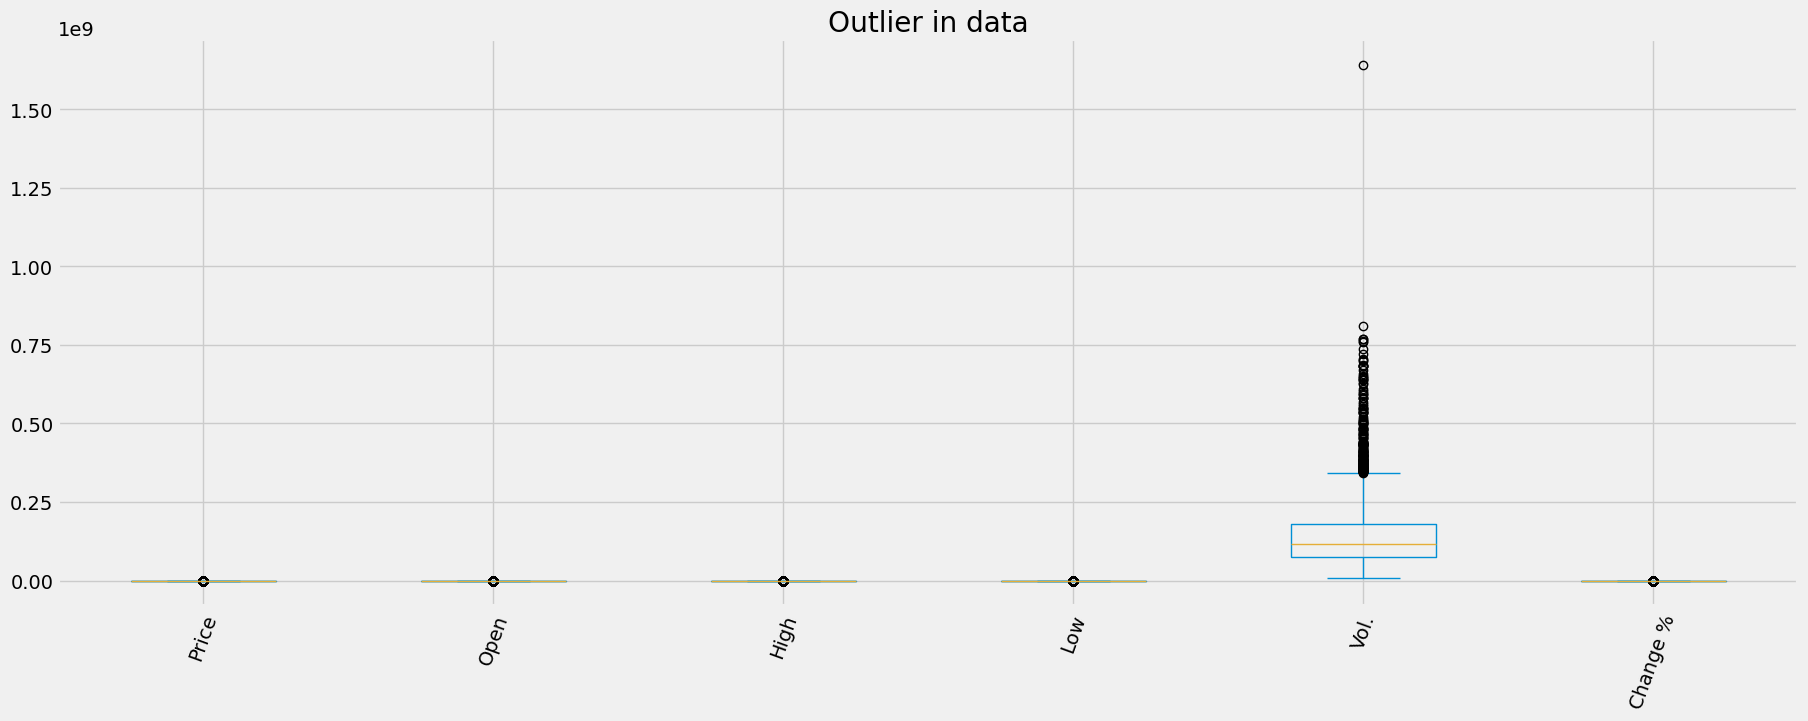

In [357]:
import matplotlib.pyplot as plt
# outlier
plt.style.use('fivethirtyeight')
outlier= df.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier in data');


In [358]:
# import pandas as pd
# from scipy.stats import zscore

# # Calculate Z-scores for the 'Price' column
# df['Z-Score'] = zscore(df['Vol.'])

# # Identify outliers (Z-Score > 3 or Z-Score < -3)
# outliers_zscore = df[(df['Z-Score'] > 3) | (df['Z-Score'] < -3)]
# print("Outliers detected using Z-Score:")
# print(outliers_zscore)

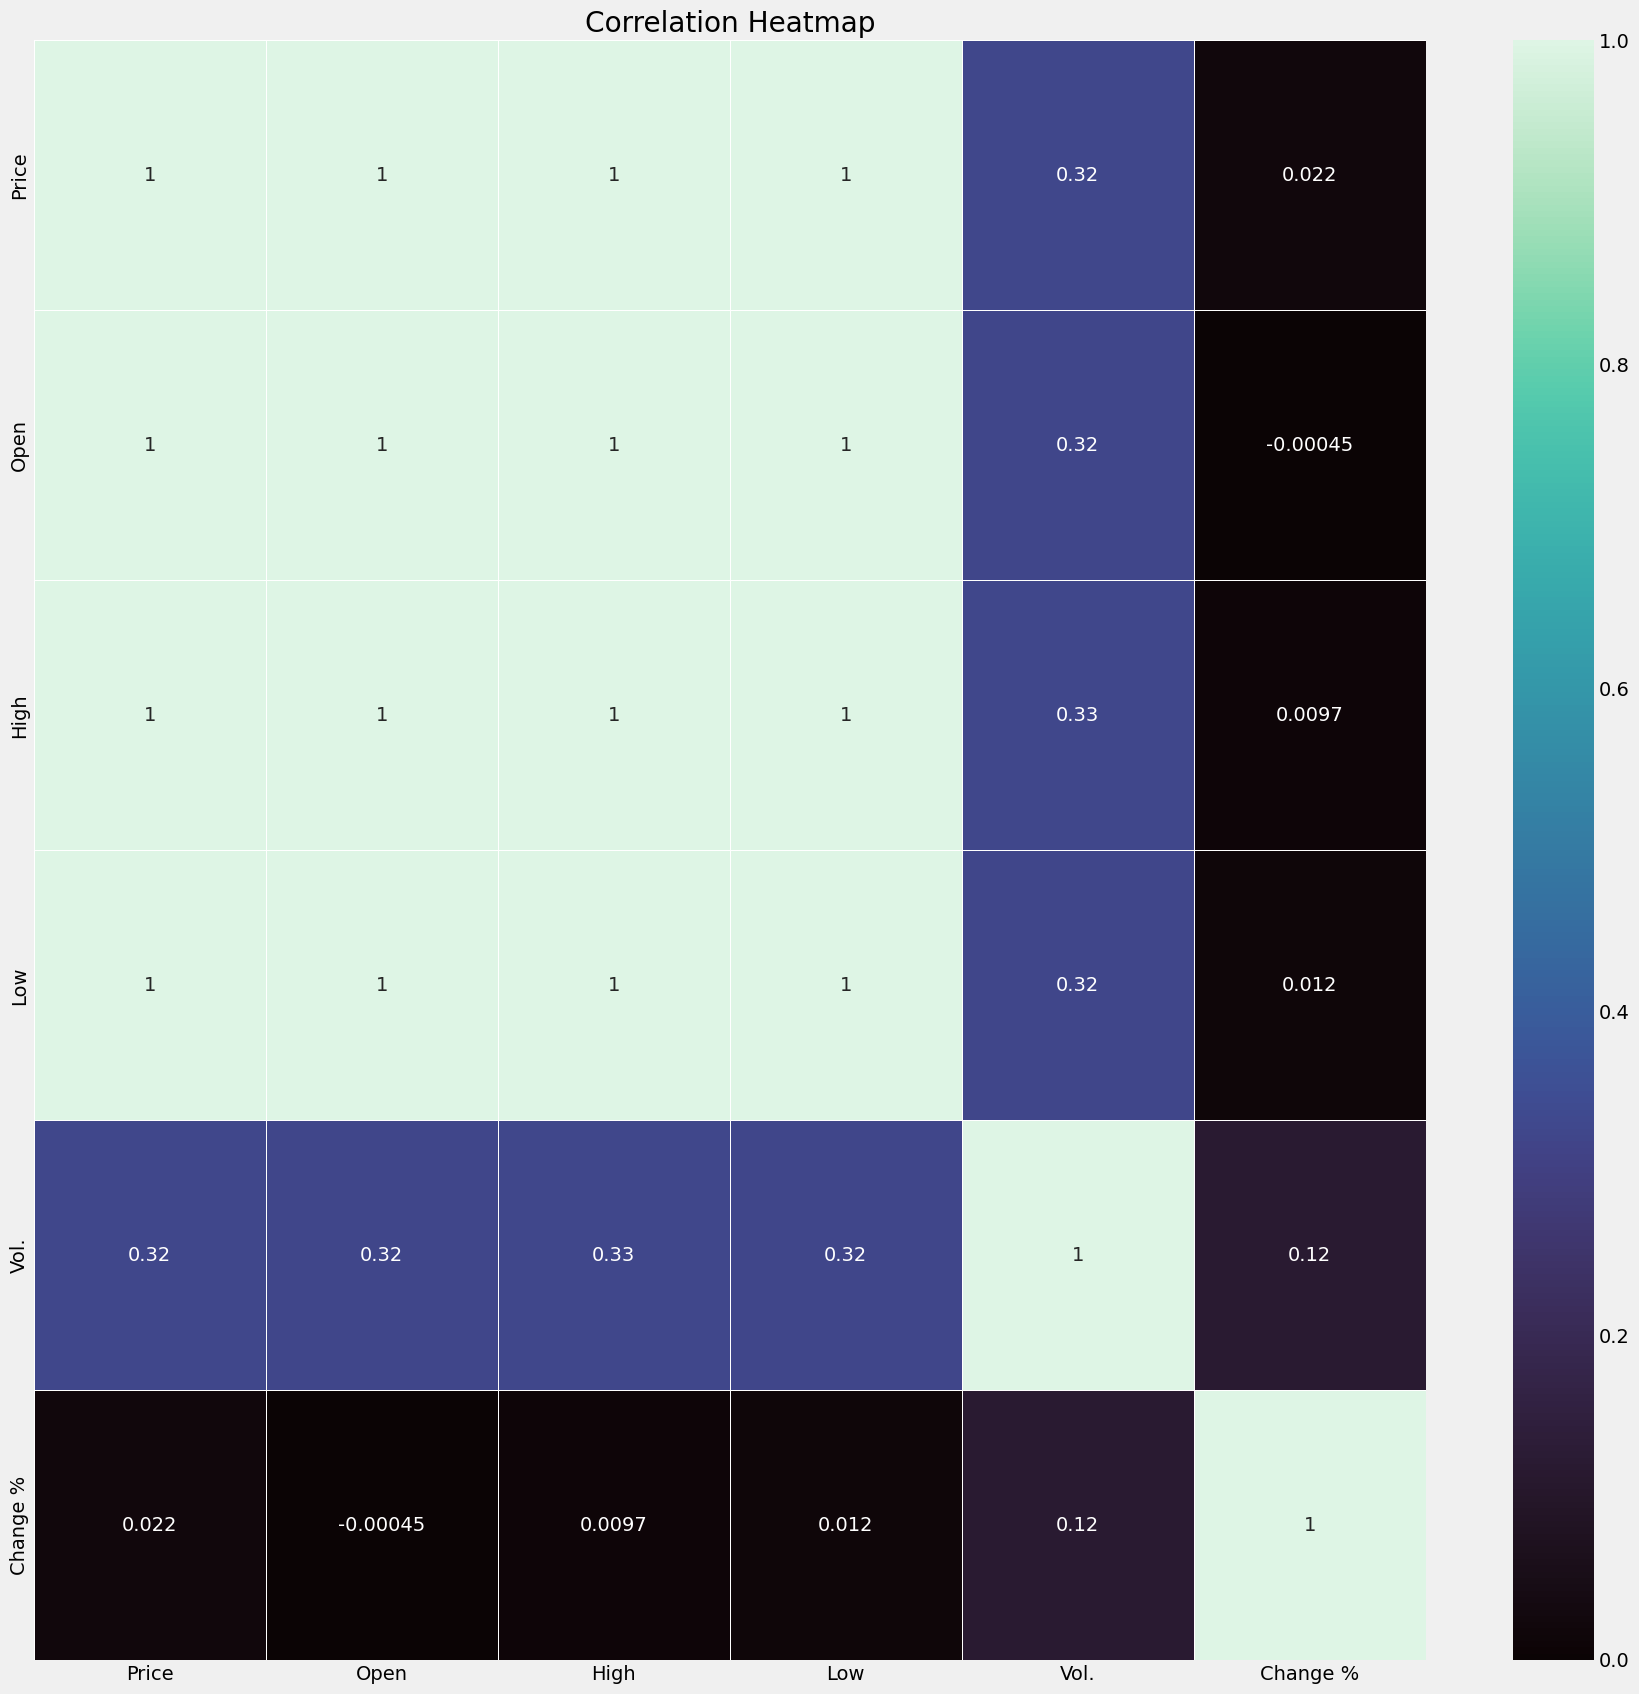

In [359]:
import seaborn as sns
numerical_features= df.select_dtypes(include=['int64', 'float64']).copy()
plt.figure(figsize=(20,20))
Correlation_df = df.select_dtypes(include=['int64', 'float64','bool']).copy()
sns.heatmap(Correlation_df.corr(), annot= True, linewidths= 0.5,cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

## Normalize Data

In [360]:
from sklearn.preprocessing import MinMaxScaler
# LSTMs work better with scaled data, so apply MinMax scaling.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Price', 'Open', 'High', 'Low', 'Vol.']])

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Price', 'Open', 'High', 'Low', 'Vol.'])
scaled_df['Date'] = df['Date'].values  # Keep the Date column


In [361]:
# We'll use a sequence of past n days (e.g., 60) to predict the next day's price.
import numpy as np

def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # Predicting 'Price' column
    return np.array(X), np.array(y)

# Convert DataFrame to NumPy array (excluding Date column)
scaled_values = scaled_df.drop(columns=['Date']).values

# Define sequence length
seq_length = 60

# Split data into training (80%) and testing (20%)
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values[:train_size], scaled_values[train_size:]

# Create sequences
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


## Create Training & Testing Data

In [362]:
import numpy as np

def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # Predicting 'Price' column
    return np.array(X), np.array(y)

# Convert DataFrame to NumPy array (excluding Date column)
scaled_values = scaled_df.drop(columns=['Date']).values

# Define sequence length
seq_length = 60

# Split data into training (80%) and testing (20%)
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values[:train_size], scaled_values[train_size:]

# Create sequences
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


## Build the LSTM Model

In [363]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(seq_length, 5)),
    Dropout(0.2),
    LSTM(units=64, return_sequences=False),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dense(units=1)  # Predicting 'Price'
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()


c:\Users\ziadh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 60, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,057 (207.25 KB)

 Trainable params: 53,057 (207.25 KB)

 Non-trainable params: 0 (0.00 B)

Train the Model


In [364]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0308 - val_loss: 1.1040e-04
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0012 - val_loss: 9.3338e-05
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0011 - val_loss: 1.0263e-04
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0011 - val_loss: 1.3237e-04
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 7.0307e-04 - val_loss: 8.7838e-05
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 8.2145e-04 - val_loss: 1.2826e-04
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 7.1488e-04 - val_loss: 2.2336e-04
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 7.9806e-04 - val_loss: 6.4346e-05
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 6.8653e-04 - val_loss: 1.1424e-04
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.2586e-04 - val_loss: 2.4041e-04
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.8701e-04 - val_loss: 5.

Evaluate the Model

In [365]:
predictions = model.predict(X_test)

# Reverse scaling
predicted_prices = scaler.inverse_transform(
    np.concatenate((predictions, np.zeros((predictions.shape[0], 4))), axis=1)
)[:, 0]

actual_prices = scaler.inverse_transform(
    np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 4))), axis=1)
)[:, 0]


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


Plot Predictions

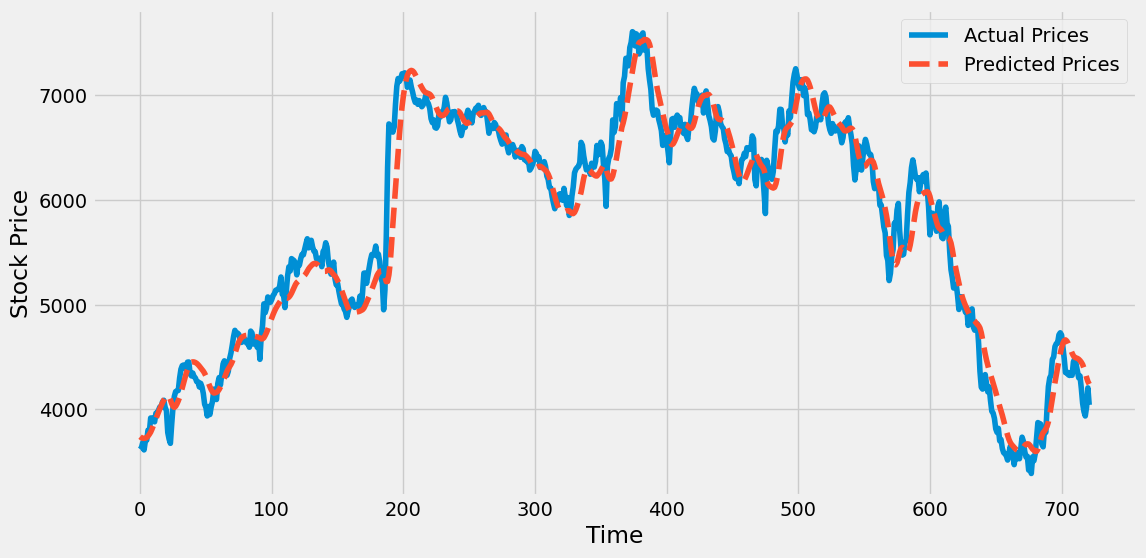

In [366]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label="Actual Prices")
plt.plot(predicted_prices, label="Predicted Prices", linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


 Performance Metrics

In [367]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 168.45
MSE: 52356.24
RMSE: 228.81


Future Predictions

In [368]:
# To predict future stock prices, use the last seq_length values.

def predict_future(n_days, model, data, scaler):
    last_seq = data[-seq_length:]
    future_predictions = []

    for _ in range(n_days):
        # Reshape to match model input
        input_seq = last_seq.reshape(1, seq_length, 5)
        
        # Predict next day's price
        predicted_price = model.predict(input_seq)[0, 0]
        
        # Append prediction and update last_seq
        future_predictions.append(predicted_price)
        last_seq = np.vstack([last_seq[1:], [predicted_price] + [0] * 4])  # Append predicted price
        
    # Reverse scale
    future_predictions = scaler.inverse_transform(
        np.concatenate((np.array(future_predictions).reshape(-1, 1), np.zeros((n_days, 4))), axis=1)
    )[:, 0]

    return future_predictions

future_prices = predict_future(7, model, scaled_values, scaler)
print("Future Prices:", future_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Future Prices: [4218.2156774  4181.93819629 4137.54227975 4086.53806023 4025.58186055
 3966.89373669 3906.17022177]
